In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt


In [2]:
# Placeholder functions for feature extraction (replace with actual logic)
def extract_spiral_bands(img):
    return np.random.rand()

def extract_eye_of_typhoon(img):
    return np.random.rand()

def extract_cloud_density(img):
    return np.random.rand()

def extract_cloud_temperature(img):
    return np.random.rand()

def extract_rainbands(img):
    return np.random.rand()

def extract_wind_field(img):
    return np.random.rand()

def extract_symmetry(img):
    return np.random.rand()

def extract_color_gradients(img):
    return np.random.rand()

def extract_brightness_contrast(img):
    return np.random.rand()

def extract_surrounding_environment(img):
    return np.random.rand()


In [3]:
# Load your CSV file containing image paths and labels
csv_file = r"D:\myproject\typhoon\zikr\path.csv"  # Update the path to your actual CSV file
df = pd.read_csv(csv_file)

# Initialize lists to store features and labels
features = []
labels = []

# Process each image and extract features
for idx, row in df.iterrows():
    img_path = row['imagepath']
    label = row['label']

    # Load image
    img = load_img(img_path, target_size=(224, 224))  # Resize to match model's input size
    img_array = img_to_array(img) / 255.0  # Normalize image

    # Extract features from the image
    spiral_bands = extract_spiral_bands(img_array)
    eye_of_typhoon = extract_eye_of_typhoon(img_array)
    cloud_density = extract_cloud_density(img_array)
    cloud_temperature = extract_cloud_temperature(img_array)
    rainbands = extract_rainbands(img_array)
    wind_field = extract_wind_field(img_array)
    symmetry = extract_symmetry(img_array)
    color_gradients = extract_color_gradients(img_array)
    brightness_contrast = extract_brightness_contrast(img_array)
    surrounding_environment = extract_surrounding_environment(img_array)

    # Store extracted features and labels
    feature_row = [
        spiral_bands,
        eye_of_typhoon,
        cloud_density,
        cloud_temperature,
        rainbands,
        wind_field,
        symmetry,
        color_gradients,
        brightness_contrast,
        surrounding_environment
    ]
    features.append(feature_row)
    labels.append(label)

# Convert features and labels into a DataFrame
feature_columns = [
    'Spiral Bands', 'Eye of the Typhoon', 'Cloud Density and Structure', 
    'Cloud Temperature (Infrared Imagery)', 'Rainbands', 'Wind Field Patterns', 
    'Symmetry', 'Color Gradients (Visible and Enhanced Imagery)', 
    'Brightness and Contrast (Lightning Activity)', 'Surrounding Environmental Features'
]

# Create a DataFrame
feature_df = pd.DataFrame(features, columns=feature_columns)
feature_df['Label'] = labels

# Save the combined features and labels to a CSV file
output_csv_path = r"D:\myproject\typhoon\zikr\combined_features.csv"
feature_df.to_csv(output_csv_path, index=False)

print(f"CSV file saved successfully at {output_csv_path}!")


CSV file saved successfully at D:\myproject\typhoon\zikr\combined_features.csv!


In [4]:
# Load the combined CSV file
df = pd.read_csv(r"D:\myproject\typhoon\zikr\combined_features.csv")

# Split data into features and labels
X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Labels

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, r"D:\myproject\typhoon\zikr\scaler.pkl")
print("Scaler saved as 'scaler.pkl'.")


Scaler saved as 'scaler.pkl'.


In [10]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
print("Best Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

# Save the best model
joblib.dump(grid_search.best_estimator_, r"D:\myproject\typhoon\zikr\typhoon_model.pkl")
print("Model saved as 'typhoon_model.pkl'.")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters from GridSearchCV:
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Model saved as 'typhoon_model.pkl'.


Accuracy: 45.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.47      0.47       220
           1       0.46      0.44      0.45       220

    accuracy                           0.46       440
   macro avg       0.46      0.46      0.46       440
weighted avg       0.46      0.46      0.46       440

Confusion Matrix:
[[104 116]
 [123  97]]


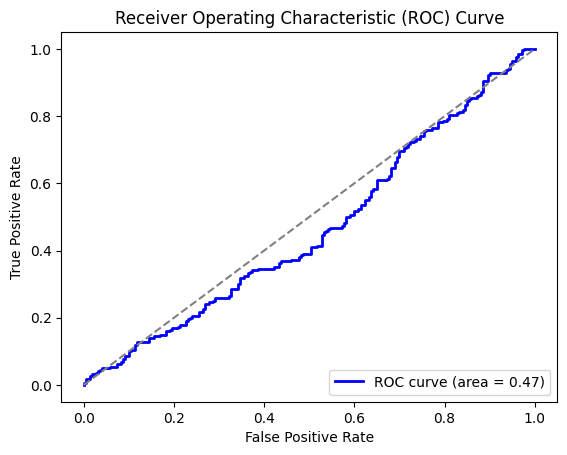

In [6]:
# Load the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [24]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define your feature extraction functions (placeholders for now)
def extract_spiral_bands(img):
    return np.random.rand()

def extract_eye_of_typhoon(img):
    return np.random.rand()

def extract_cloud_density(img):
    return np.random.rand()

def extract_cloud_temperature(img):
    return np.random.rand()

def extract_rainbands(img):
    return np.random.rand()

def extract_wind_field(img):
    return np.random.rand()

def extract_symmetry(img):
    return np.random.rand()

def extract_color_gradients(img):
    return np.random.rand()

def extract_brightness_contrast(img):
    return np.random.rand()

def extract_surrounding_environment(img):
    return np.random.rand()

# Path to the folder containing images
folder_path = r"D:\myproject\typhoon\zikr\test"  # Update with your folder path

# Get a list of all image files in the folder (assuming .jpg files for example)
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # You can modify this if needed

# Print out the image files to verify the list
print(f"Found {len(image_files)} image files in the folder: {image_files}")

# List to store feature data for each image
all_features = []

# Iterate over all images in the folder
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(224, 224))  # Resize to match training
        img_array = img_to_array(img) / 255.0  # Normalize

        # Extract features for the image
        features = [
            img_path,  # Include the image path
            extract_spiral_bands(img_array),
            extract_eye_of_typhoon(img_array),
            extract_cloud_density(img_array),
            extract_cloud_temperature(img_array),
            extract_rainbands(img_array),
            extract_wind_field(img_array),
            extract_symmetry(img_array),
            extract_color_gradients(img_array),
            extract_brightness_contrast(img_array),
            extract_surrounding_environment(img_array),
        ]

        # Add the features for the image to the list
        all_features.append(features)
        print(f"Processed: {img_file}")  # Print the image file name to track progress

    except Exception as e:
        print(f"Error processing {img_file}: {e}")

# Create a DataFrame with all the features (including image path)
feature_df = pd.DataFrame(all_features, columns=[
    'Image Path', 'Spiral Bands', 'Eye of the Typhoon', 'Cloud Density and Structure', 
    'Cloud Temperature (Infrared Imagery)', 'Rainbands', 'Wind Field Patterns', 
    'Symmetry', 'Color Gradients (Visible and Enhanced Imagery)', 
    'Brightness and Contrast (Lightning Activity)', 'Surrounding Environmental Features'
])

# Save the features to a CSV file
output_csv_path = r"D:\myproject\typhoon\zikr\Infrared_features.csv"  # Update with your desired output path
feature_df.to_csv(output_csv_path, index=False)

print(f"Features for {len(image_files)} images saved successfully to {output_csv_path}!")


Found 5 image files in the folder: ['img10.jpg', 'img6.jpg', 'img7.jpg', 'img8.jpg', 'img9.jpg']
Processed: img10.jpg
Processed: img6.jpg
Processed: img7.jpg
Processed: img8.jpg
Processed: img9.jpg
Features for 5 images saved successfully to D:\myproject\typhoon\zikr\Infrared_features.csv!


In [23]:
# Load the trained model and scaler
model_path = r"D:\myproject\typhoon\zikr\typhoon_model.pkl"
scaler_path = r"D:\myproject\typhoon\zikr\scaler.pkl"

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Path to the new image's feature CSV
feature_csv_path = r"D:\myproject\typhoon\zikr\Infrared_features.csv"

# Load the features of the new image
features_df = pd.read_csv(feature_csv_path)

# Scale the features using the saved scaler
scaled_features = scaler.transform(features_df)

# Make predictions
predictions = model.predict(scaled_features)
predicted_probabilities = model.predict_proba(scaled_features)

# Output the predictions
for i, pred in enumerate(predictions):
    typhoon_status = "Typhoon" if pred == 1 else "Non-Typhoon"
    confidence = predicted_probabilities[i][pred]
    print(f"Prediction for image {i+1}: {typhoon_status} with confidence {confidence:.2f}")


Prediction for image 1: Typhoon with confidence 0.63
Prediction for image 2: Typhoon with confidence 0.55
Prediction for image 3: Typhoon with confidence 0.52
Prediction for image 4: Typhoon with confidence 0.53
Prediction for image 5: Typhoon with confidence 0.52


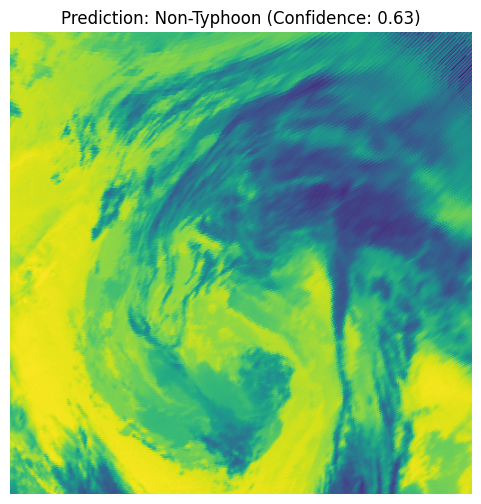

Prediction for image 1 (D:\myproject\typhoon\zikr\test\img10.jpg): Non-Typhoon with confidence 0.63


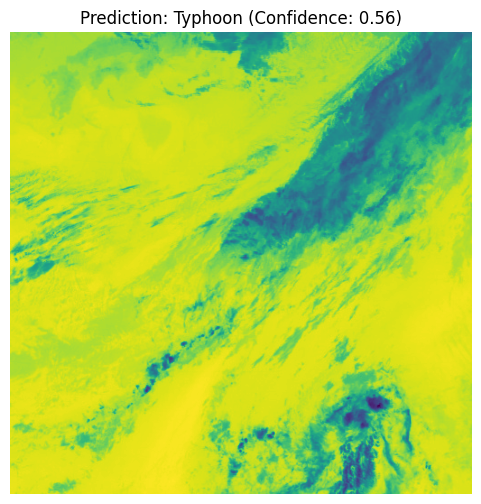

Prediction for image 2 (D:\myproject\typhoon\zikr\test\img6.jpg): Typhoon with confidence 0.56


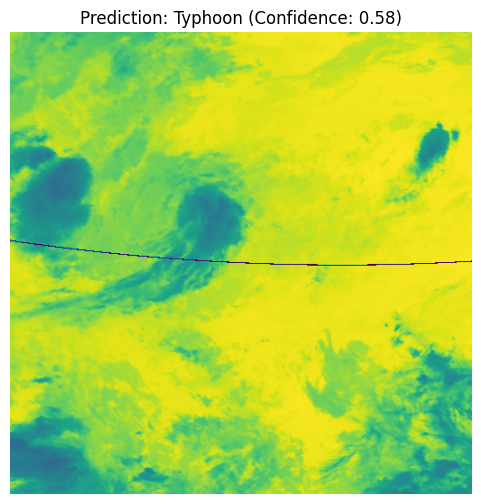

Prediction for image 3 (D:\myproject\typhoon\zikr\test\img7.jpg): Typhoon with confidence 0.58


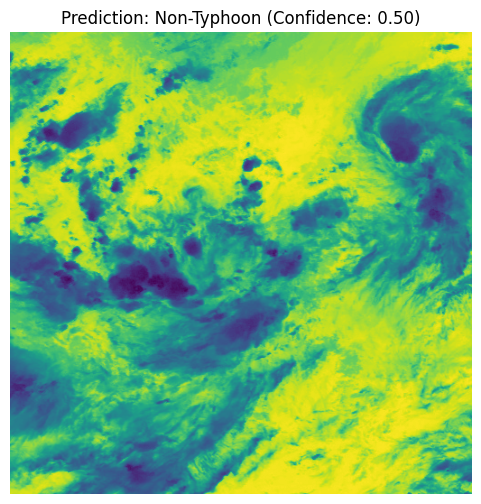

Prediction for image 4 (D:\myproject\typhoon\zikr\test\img8.jpg): Non-Typhoon with confidence 0.50


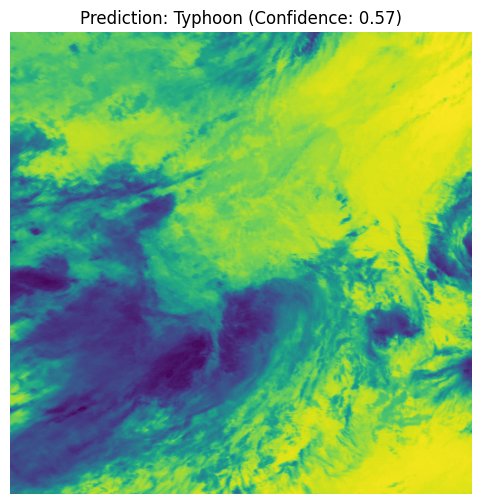

Prediction for image 5 (D:\myproject\typhoon\zikr\test\img9.jpg): Typhoon with confidence 0.57


In [26]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the trained model and scaler
model_path = r"D:\myproject\typhoon\zikr\typhoon_model.pkl"
scaler_path = r"D:\myproject\typhoon\zikr\scaler.pkl"

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Path to the new image's feature CSV
feature_csv_path = r"D:\myproject\typhoon\zikr\Infrared_features.csv"

# Load the features of the new image
features_df = pd.read_csv(feature_csv_path)

# Scale the features using the saved scaler
scaled_features = scaler.transform(features_df.drop('Image Path', axis=1))  # Drop the 'Image Path' column for scaling

# Make predictions
predictions = model.predict(scaled_features)
predicted_probabilities = model.predict_proba(scaled_features)

# Output the predictions and display the images
for i, pred in enumerate(predictions):
    typhoon_status = "Typhoon" if pred == 1 else "Non-Typhoon"
    confidence = predicted_probabilities[i][pred]
    image_path = features_df.iloc[i]['Image Path']  # Extract the image path for each image
    
    # Display the image using matplotlib
    img = mpimg.imread(image_path)  # Read the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {typhoon_status} (Confidence: {confidence:.2f})")
    plt.axis('off')  # Hide axis for better display
    plt.show()
    
    # Print image path and prediction
    print(f"Prediction for image {i+1} ({image_path}): {typhoon_status} with confidence {confidence:.2f}")
